<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
Math = []
State = []
Rate = []
Verbal = []
sat_dict1 = {}
with open("sat_scores.csv") as file:
    reader = csv.DictReader(file)
    for row in reader:
        Math.append(float(row['Math']))
        State.append(row['State'])
        Rate.append(float(row['Rate']))
        Verbal.append(float(row['Verbal']))

sat_dict1['Math'] =  Math[:-1]
sat_dict1['State'] = State[:-1]
sat_dict1['Rate'] = Rate[:-1]
sat_dict1['Verbal'] = Verbal[:-1]

print sat_dict1

{'Verbal': [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0, 584.0, 562.0, 575.0, 593.0, 577.0, 592.0, 566.0], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0], 'Math': [51

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
sat_fromdict = pd.DataFrame(sat_dict1)

sat_df = pd.read_csv("sat_scores.csv")
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [5]:
sat_df.info()
sat_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


<div class="alert alert-block alert-warning">There shouldn't be 52 states</div>


In [6]:
sat_df.drop(51,inplace = True)

In [7]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [8]:
sat_fromdict.dtypes

Math      float64
Rate      float64
State      object
Verbal    float64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

Pandas will automatically detect numeric strings and process them into the correct dtypes of Float or Integers

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [11]:
def data_dict(df):
    colname = df.columns.tolist()
    shape = df.shape
    col_type = []
    df_dict={}
    var_desc = ["State: 2 letter abbreviation of US states", "Rate: Participation rates of each state", 
                "Verbal: Scores for verbal ability", "Math: Scores for Math ability"]
    keys = ["Col_Name", "Col_Type", "Var_Desc", "Shape"]
    for col in colname:
        col_type.append(df[col].dtypes)
        
    for key in keys:
        if key ==  "Col_Name":
            df_dict[key] = colname
        elif key == "Col_Type":
            df_dict[key] = col_type
            
        elif key =="Var_Desc":
            df_dict[key] = var_desc 
            
        elif key == "Shape":
            df_dict[key] = shape
     
    return df_dict

In [12]:
pprint (data_dict(sat_df))

{'Col_Name': ['State', 'Rate', 'Verbal', 'Math'],
 'Col_Type': [dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')],
 'Shape': (51, 4),
 'Var_Desc': ['State: 2 letter abbreviation of US states',
              'Rate: Participation rates of each state',
              'Verbal: Scores for verbal ability',
              'Math: Scores for Math ability']}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

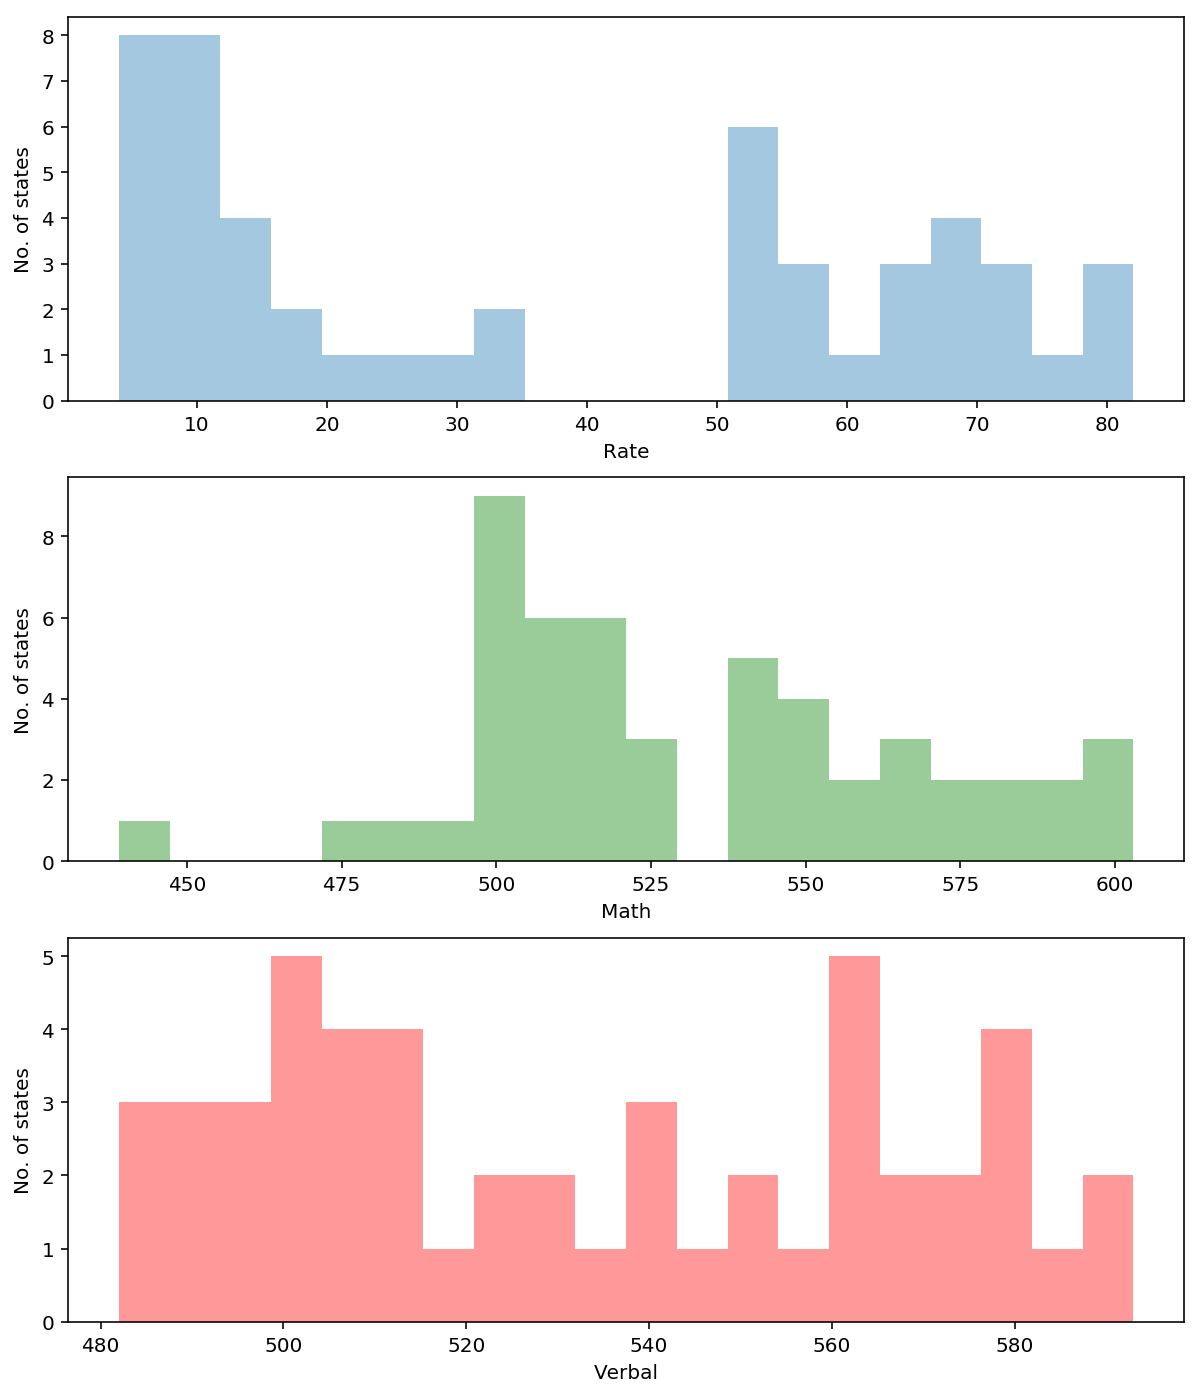

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,12))
plt.subplot(3,1,1)
sns.distplot(sat_df["Rate"], bins = 20,kde=False)
plt.ylabel('No. of states')
plt.subplot(3,1,2)
sns.distplot(sat_df["Math"], bins = 20,kde=False, color = 'green')
plt.ylabel('No. of states')
plt.subplot(3,1,3)
sns.distplot(sat_df["Verbal"], bins = 20,kde=False, color='red')
plt.ylabel('No. of states')
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

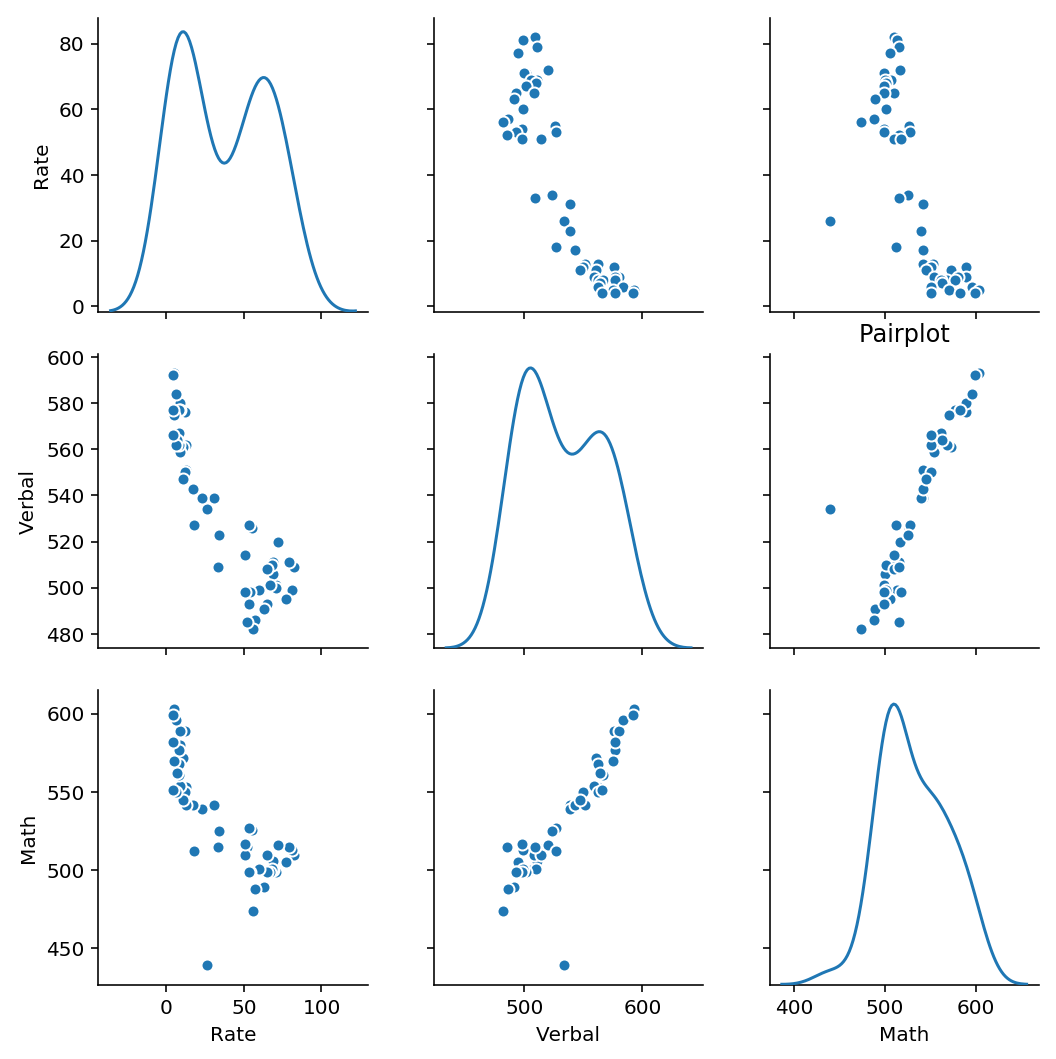

In [14]:
sns.pairplot(sat_df, diag_kind="kde")
plt.title('Pairplot')

<div class="alert alert-block alert-success"> Verbal and Rate seem to have bimodal distributions. <br>

Verbal has a positive correlation with Math.

<br>Both Verbal and Math have negative correlation with Rate.</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

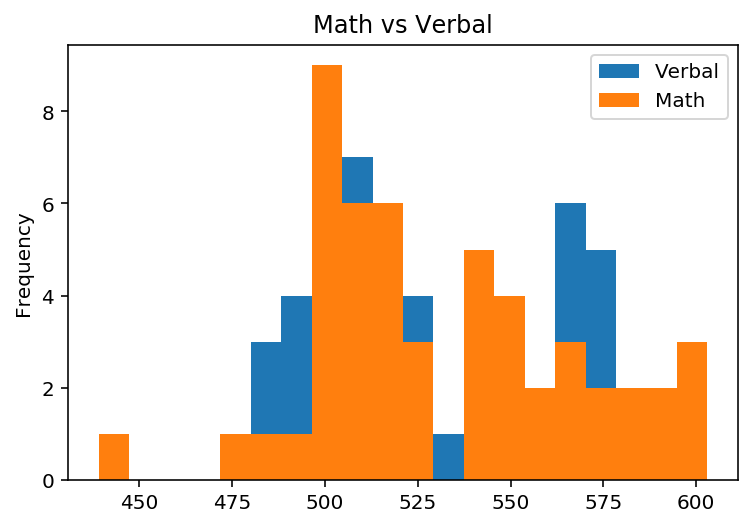

In [15]:
sat_df[["Verbal","Math"]].plot(kind = "hist", bins = 20, title = "Math vs Verbal")

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

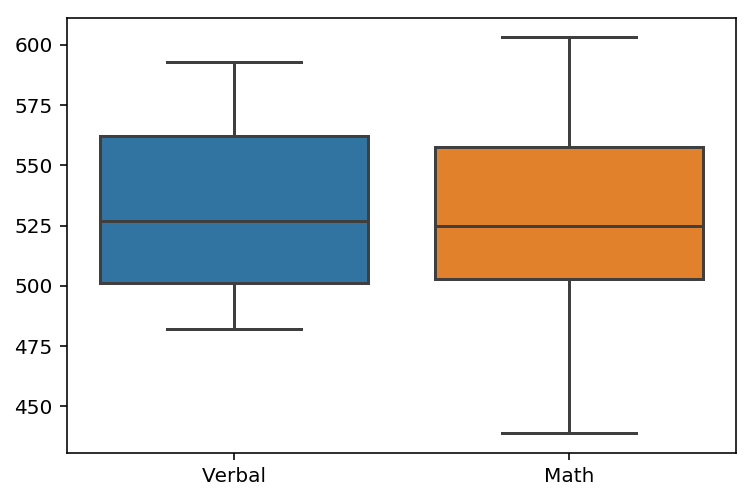

In [16]:
sns.boxplot(data=sat_df[["Verbal","Math"]])

<div class="alert alert-block alert-success">Boxplot can give additional information like median, 25th and 75th percentiles as well as outliers in a single plot, which scatterplot and histograms cannot.
<br>
<br>Rate is on a totally different scale as Verbal and Math, hence it shouldn't be plotted on the same chart as them.</div>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


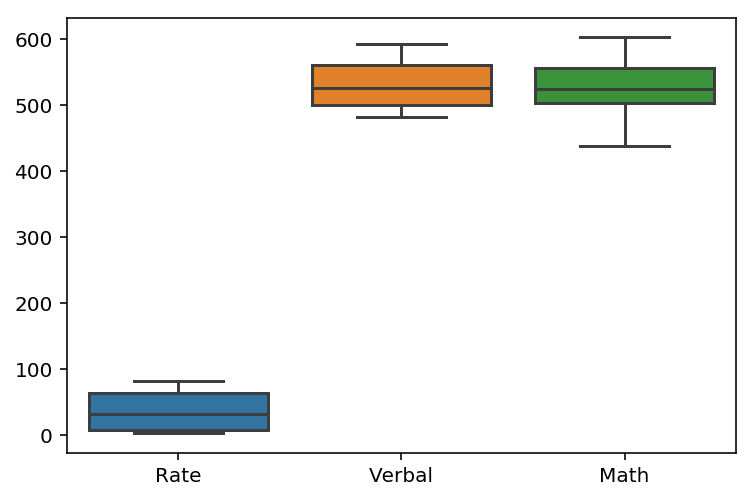

In [17]:
sns.boxplot(data=sat_df)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
sat_df.Verbal.mean()

532.52941176470586

In [19]:
Verbal_states_mean = sat_df[sat_df.Verbal > sat_df.Verbal.mean()]

In [20]:
Verbal_states_mean.State.unique()

array(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN',
       'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD',
       'ND', 'MS'], dtype=object)

In [21]:
len(Verbal_states_mean.State.unique())

24

<div class="alert alert-block alert-warning">### This tells us that about half the 51 US states have greater than the average of Verbal scores###</div>

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [22]:
sat_df.Verbal.median()

527.0

In [23]:
Verbal_states_median = sat_df[sat_df.Verbal > sat_df.Verbal.median()]

In [24]:
Verbal_states_median.State.unique()

array(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN',
       'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD',
       'ND', 'MS'], dtype=object)

In [25]:
len(Verbal_states_median.State.unique())   

24

<div class="alert alert-block alert-warning">The list of states with greater than median Verbal scores is almost the same as the other list, since the median and mean values of Verbal are almost the same</div>

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [26]:
sat_df1 = sat_df.copy()
sat_df1["Verbal-Math"] = sat_df1.Verbal - sat_df1.Math
sat_df1

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [27]:
Top10 = sat_df1.sort_values("Verbal-Math", ascending = True).nlargest(10,"Verbal-Math")

In [28]:
Bottom10 = sat_df1.sort_values("Verbal-Math", ascending = True).nsmallest(10,"Verbal-Math")

In [29]:
print Top10.head(3)
print Bottom10.head(3)

   State  Rate  Verbal  Math  Verbal-Math
27    OH    26     534   439           95
29    WV    18     527   512           15
50    MS     4     566   551           15
   State  Rate  Verbal  Math  Verbal-Math
21    HI    52     485   515          -30
23    CA    51     498   517          -19
1     NJ    81     499   513          -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [30]:
sat_df.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<div class="alert alert-block alert-success"> Correlation is discussed below in Qn 6.3 </div>

In [31]:
sat_df.cov()

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [32]:
sat_df.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

**[Covariance]** <img src = "http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_multivariable/Correlation2.png">


**[Correlation]** <img src = "http://www.geography.ryerson.ca/michalak/geo814/correlation.gif"  alt = "Correlation">

<div class="alert alert-block alert-success">#1. Both covariance and correlation measure the codependence between two variables, i.e the degree of linear relationship between them. However, the value of correlation lies between -1 and +1 while covariance lies between -∞ and +∞.
<br>
<br>Correlation (dimensionless) is a scaled form of covariance.</div>

<div class="alert alert-block alert-success">#2. The process to convert the covariance into the correlation is called scaling. It removes the influence that the inherent variability of each dataset has on the codependence.</div>

<div class="alert alert-block alert-success">#3. It is preferred because it is not affected by the spread in each variable. </div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [33]:
drugs = pd.read_csv('drug-use-by-age.csv')

In [34]:
#drugs.iloc[:,19]
drugs.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [35]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f


> No missing variables.

> But age-group 65+ has a number of missing info in some columns


In [36]:
def cleanup(series):
    
    return series.map(lambda x: 0 if x == "-" else x)

In [37]:
new_drugs = drugs.apply(cleanup, axis=1)

In [38]:
new_drugs.iloc[:,2:] = new_drugs.iloc[:,2:].astype(float)

In [39]:
print new_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

<div class="alert alert-block alert-warning"> Cleaned up dashes and converted all numeric columns to float</div>

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [40]:
cols = drugs.columns.tolist()
print cols

['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use', 'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use', 'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use', 'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency', 'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use', 'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency', 'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency', 'sedative-use', 'sedative-frequency']


In [41]:
drugs_freq = new_drugs.drop(cols[2::2],axis=1)

In [42]:
drugs_pc_use = new_drugs.drop(cols[3::2], axis=1)

In [43]:
drugs_freq.tail(10)

,age,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
7,19,2223,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0
8,20,2271,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0
9,21,2354,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0
10,22-23,4707,52.0,52.0,5.0,5.0,57.5,3.0,4.0,15.0,17.5,12.0,10.0,46.0,52.0
11,24-25,4591,52.0,60.0,6.0,6.0,88.0,2.0,2.0,15.0,20.0,10.0,10.0,21.0,17.5
12,26-29,2628,52.0,52.0,5.0,6.0,50.0,3.0,4.0,13.0,13.5,10.0,7.0,30.0,4.0
13,30-34,2864,52.0,72.0,8.0,15.0,66.0,2.0,3.5,22.0,46.0,8.0,12.0,54.0,10.0
14,35-49,7391,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,24.0,104.0,10.0
15,50-64,3923,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,24.0,30.0,104.0
16,65+,2448,52.0,36.0,0.0,0.0,120.0,2.0,0.0,24.0,0.0,5.0,364.0,0.0,15.0


Total num of respondents =  55268


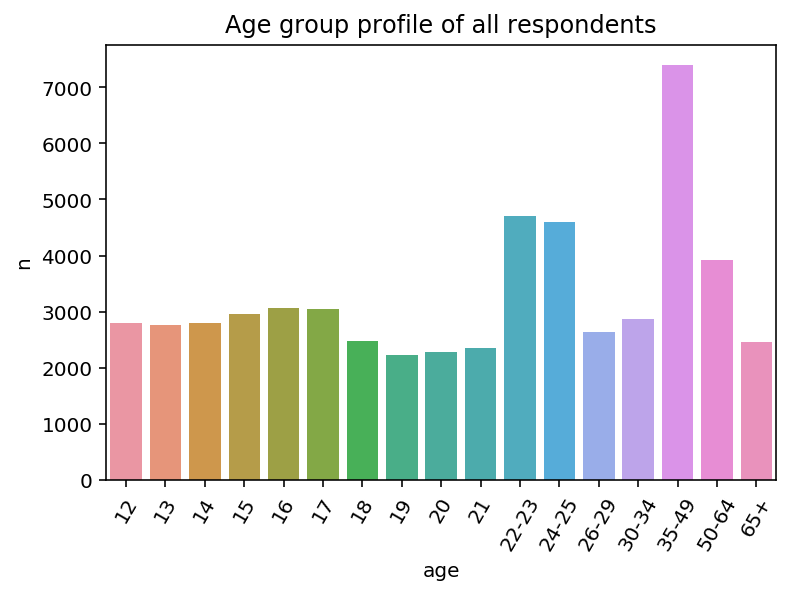

In [44]:
#Find out the profile of all the respondents
sns.barplot(x='age',y='n',data=drugs_freq)
plt.xticks(rotation=60)
plt.title("Age group profile of all respondents")
print 'Total num of respondents = ', drugs_freq.n.sum()

<div class="alert alert-block alert-info">  Explore Frequency of Use across all drugs </div>

In [45]:
drugfreqdist = drugs_freq.drop('n',axis=1).set_index("age")
drugfreqdist_trans = drugfreqdist.transpose() 

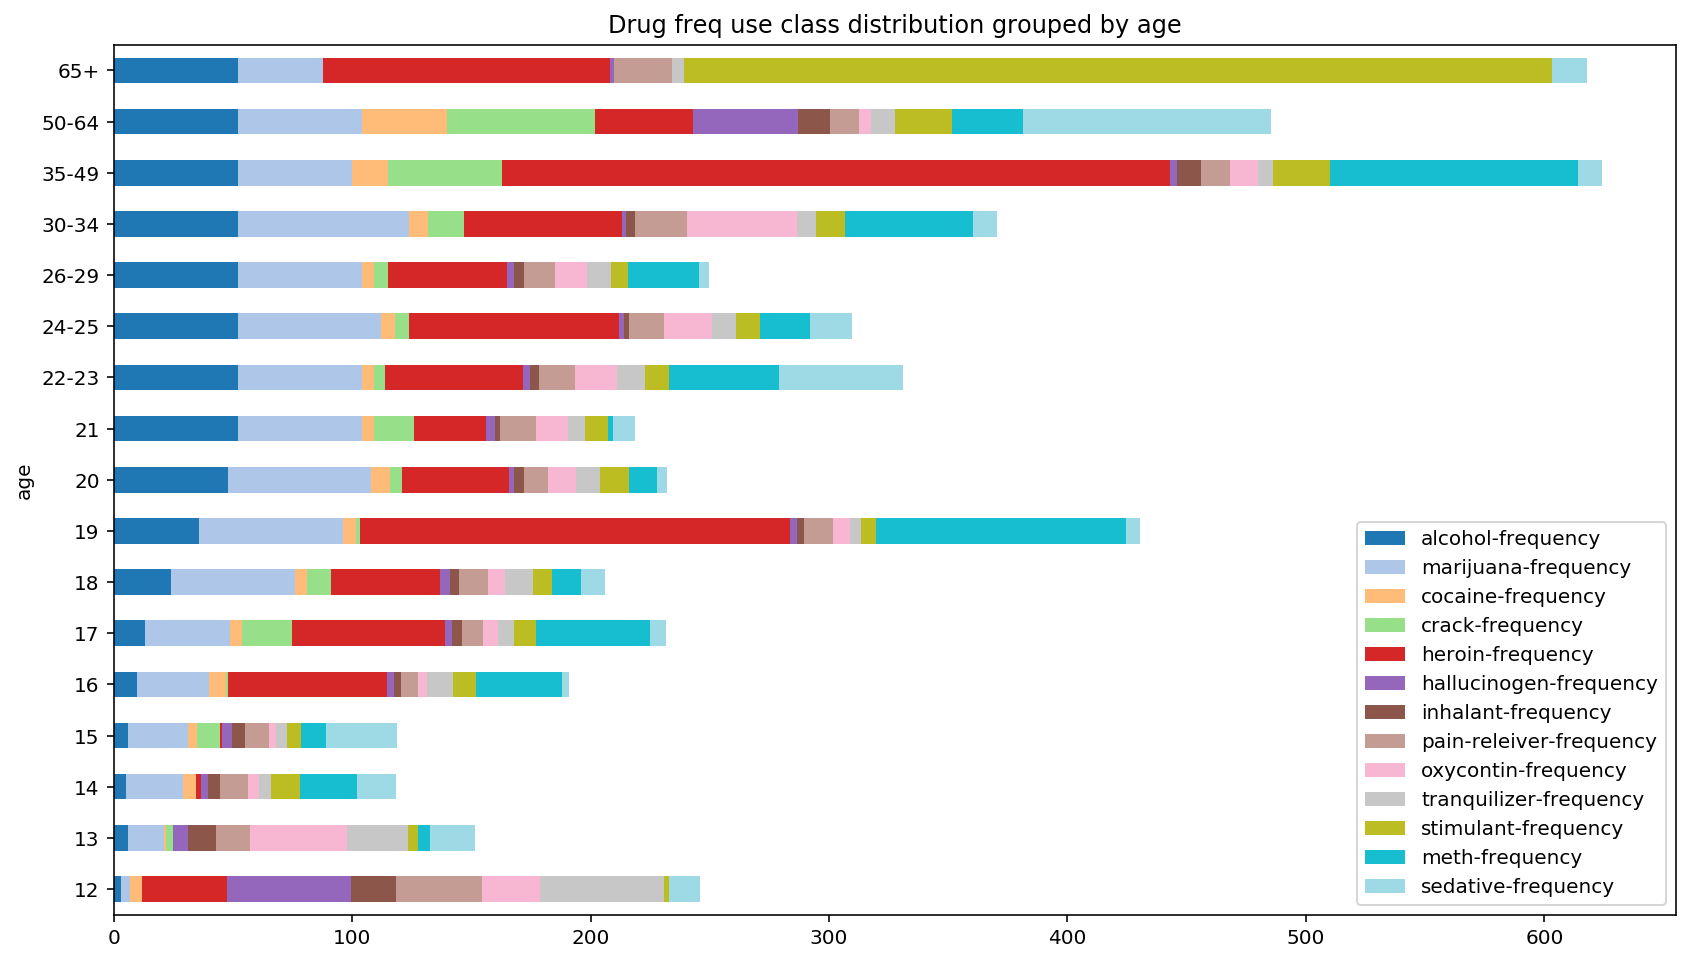

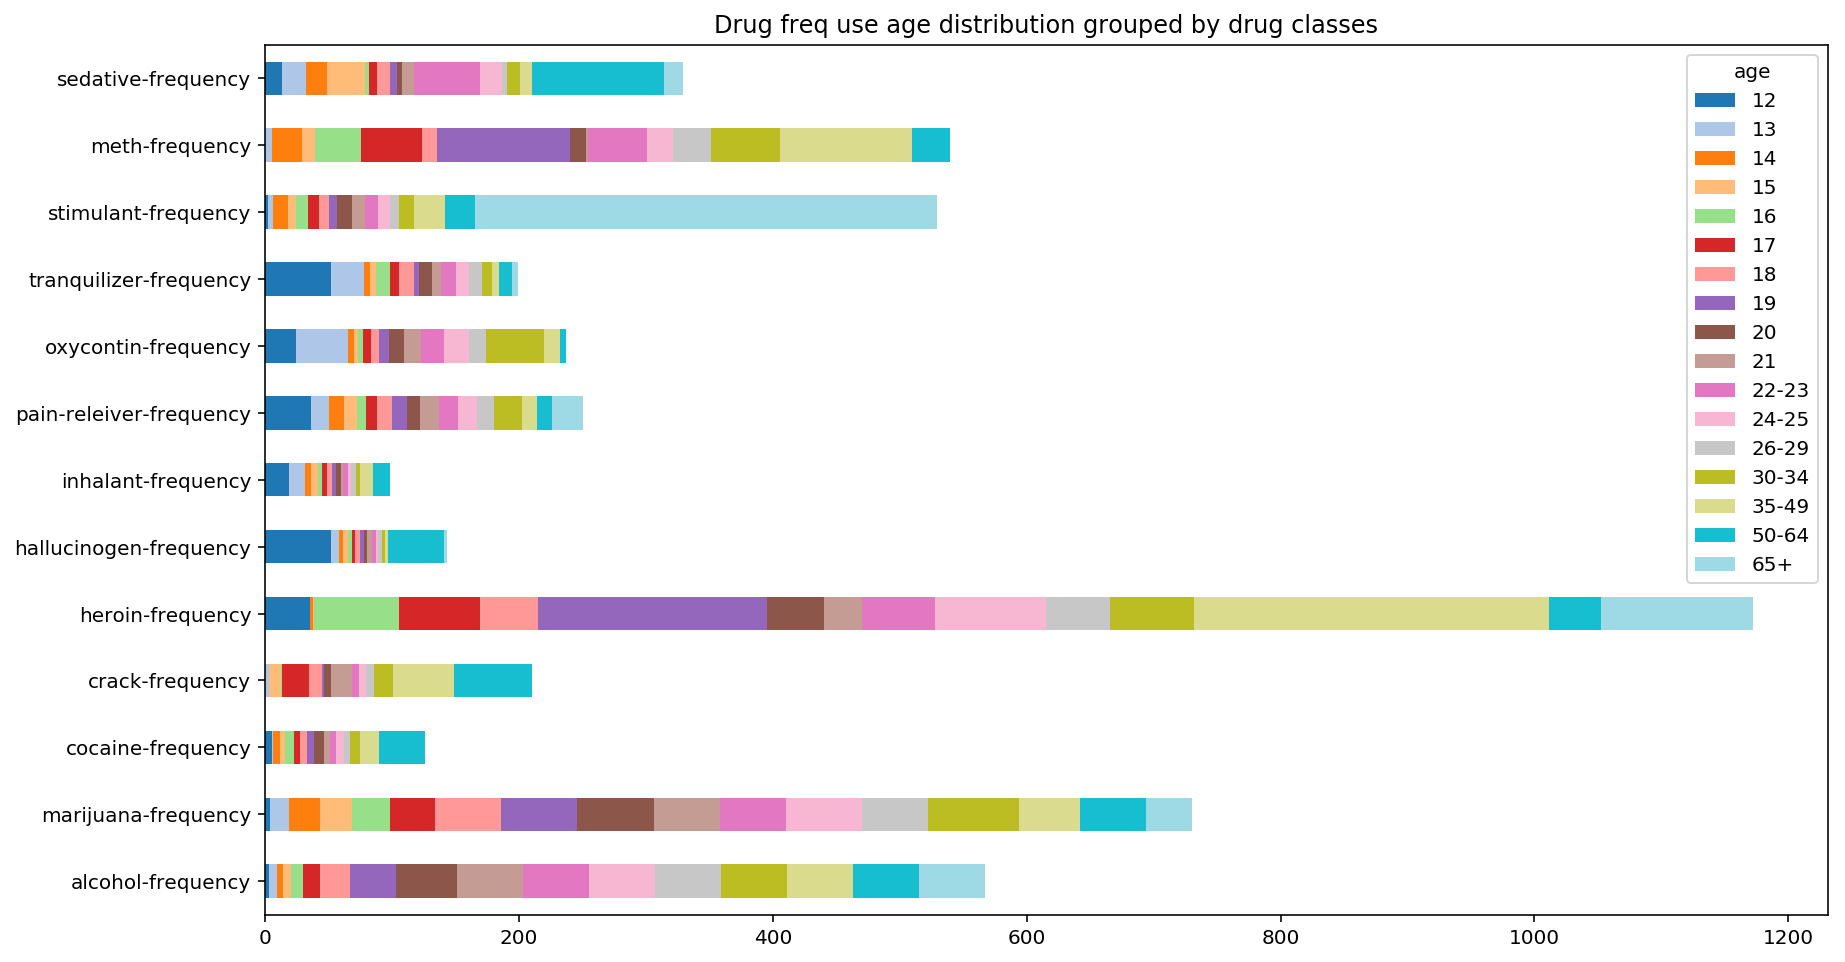

In [46]:
drugfreqdist.plot.barh(stacked = True, figsize=(14,8),colormap="tab20")
plt.title('Drug freq use class distribution grouped by age')
plt.legend(bbox_to_anchor=(1.0, 0), loc='lower right', ncol=1)

drugfreqdist_trans.plot.barh(stacked = True, figsize=(14,8),colormap="tab20")
plt.title('Drug freq use age distribution grouped by drug classes')

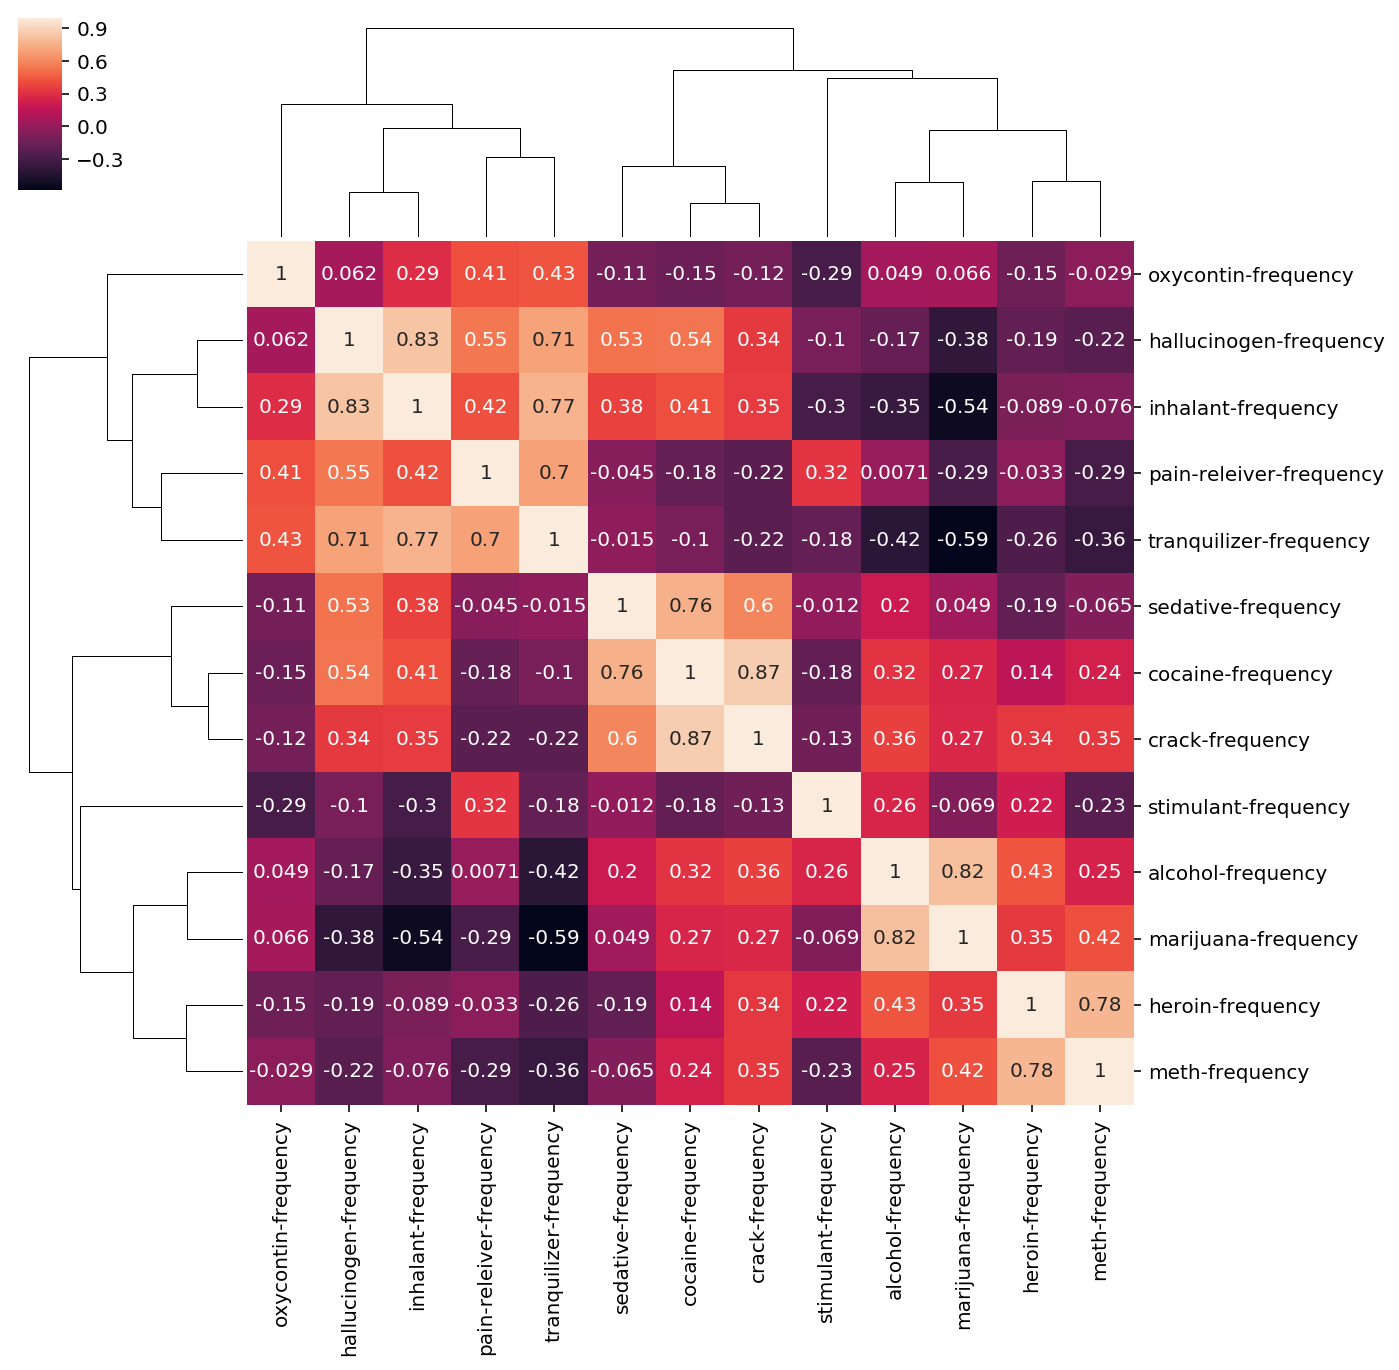

In [47]:
sns.clustermap(drugfreqdist.corr(),annot=True)

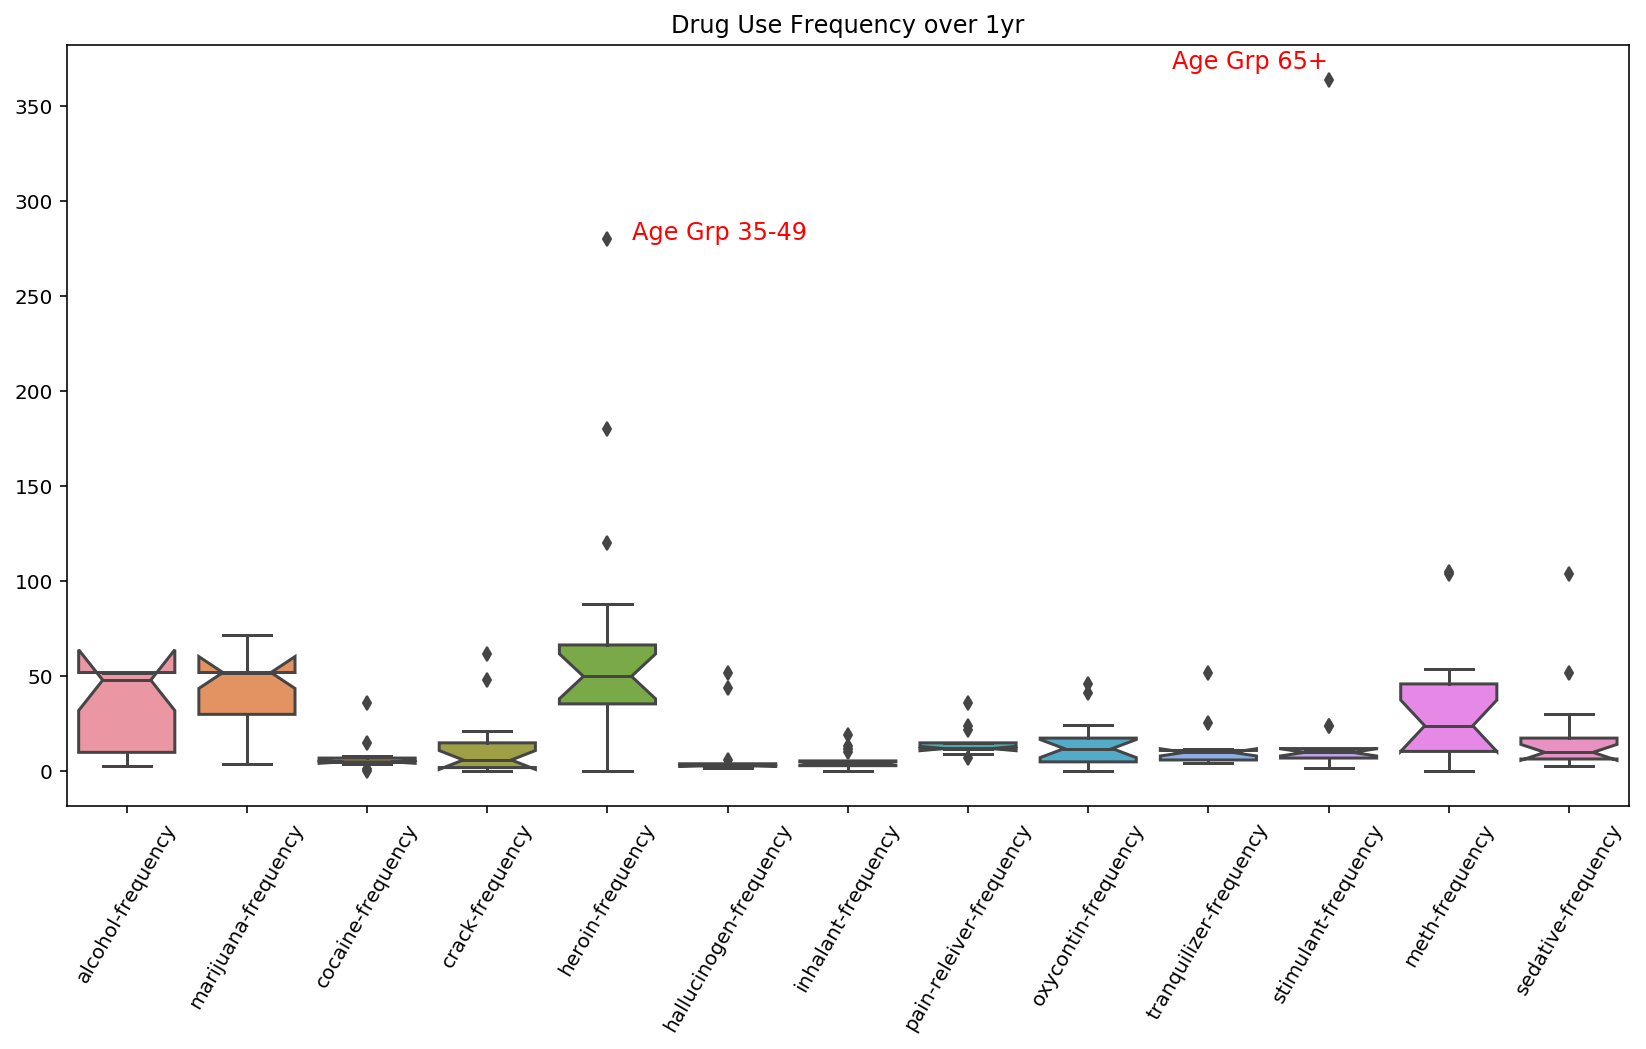

In [48]:
plt.figure(figsize=(14,7))
sns.boxplot(data=drugs_freq.iloc[:,2:],whis=1.5,notch=True)
plt.title('Drug Use Frequency over 1yr')
plt.xticks(rotation=60)
plt.annotate("Age Grp 65+", xy=(8.7,370),xytext = (8.7,370),fontsize=12,color='red')
plt.annotate("Age Grp 35-49", xy=(4.2,280),xytext = (4.2,280),fontsize=12,color='red')

<div class="alert alert-block alert-info">  Explore % of users across all drugs </div>

In [49]:
drugpcdist = drugs_pc_use.drop('n',axis=1).set_index("age")
drugpcdist_trans = drugpcdist.transpose() 

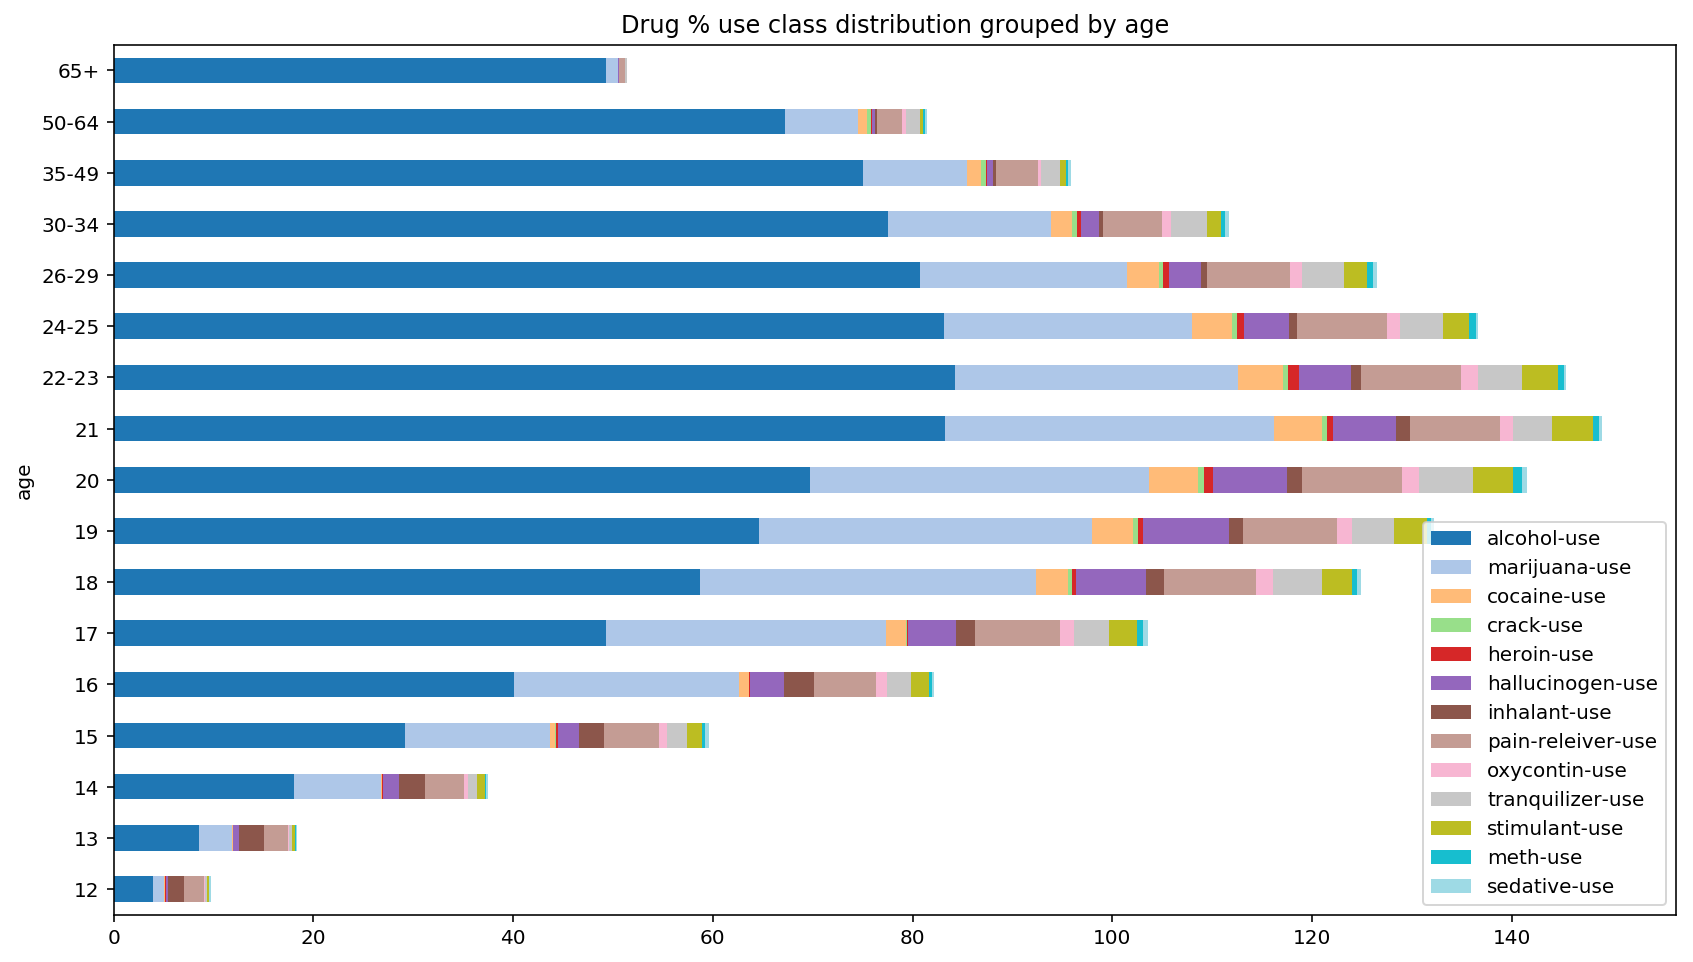

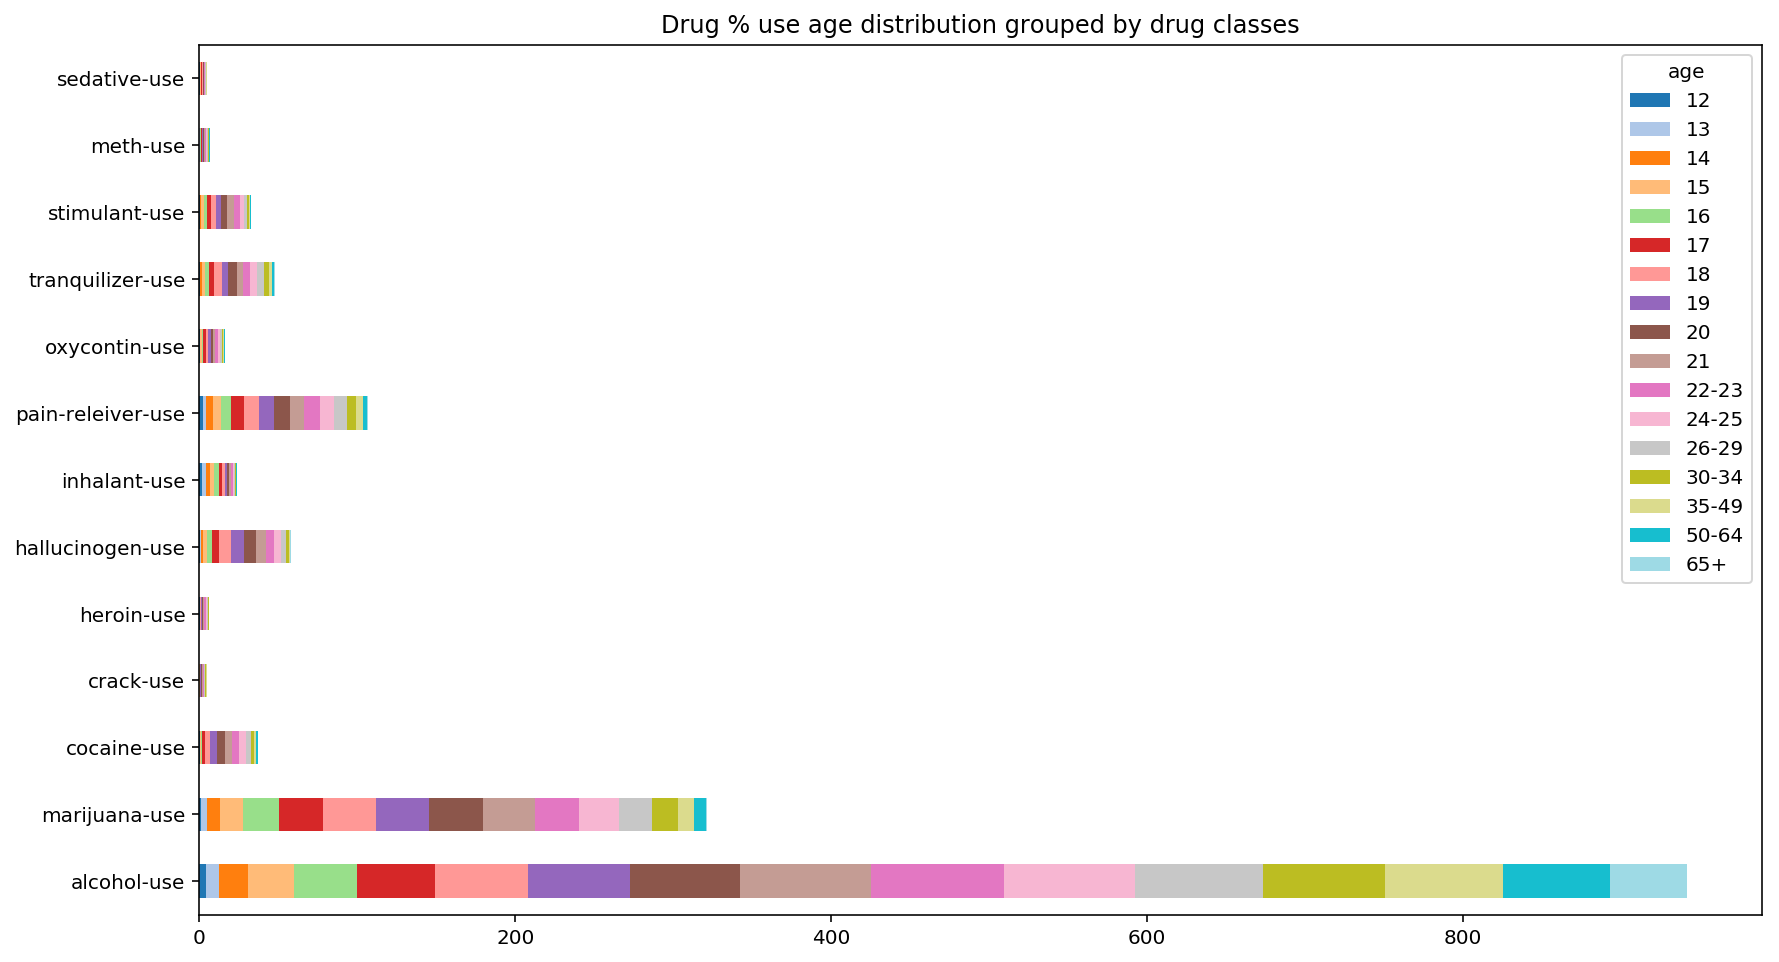

In [50]:
drugpcdist.plot.barh(stacked = True, figsize=(14,8),colormap="tab20")
plt.title('Drug % use class distribution grouped by age')
plt.legend(bbox_to_anchor=(1.0, 0), loc='lower right', ncol=1)

drugpcdist_trans.plot.barh(stacked = True, figsize=(14,8),colormap="tab20")
plt.title('Drug % use age distribution grouped by drug classes')

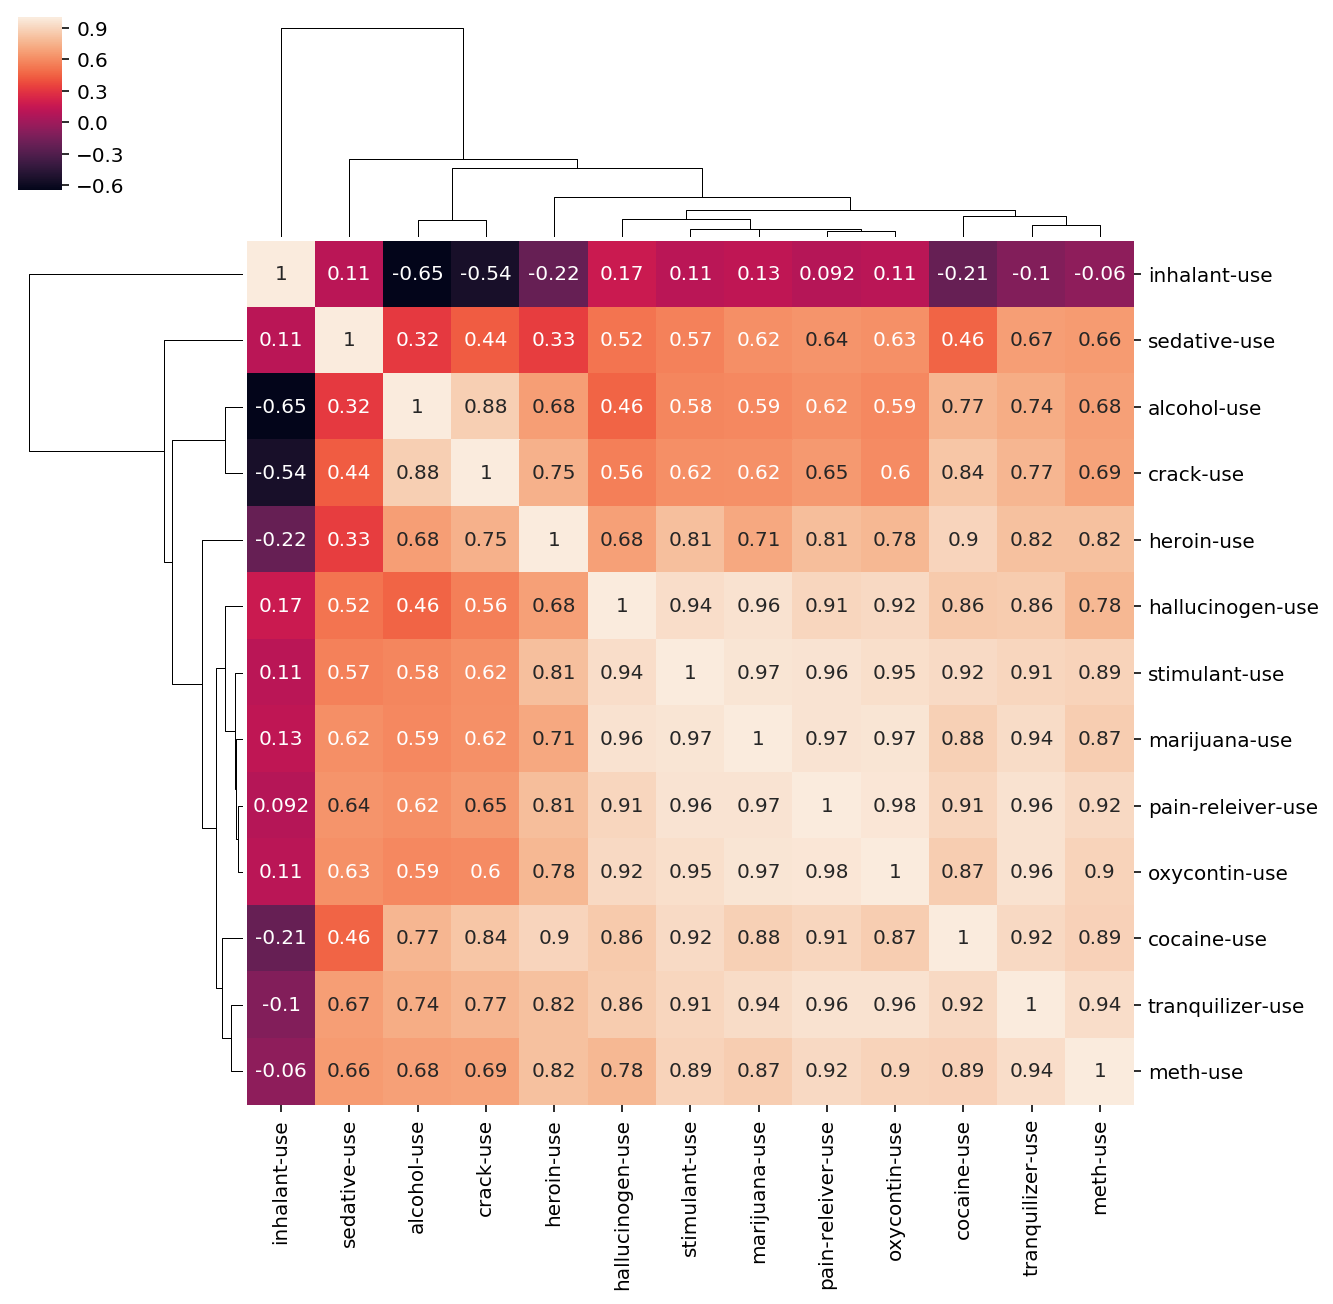

In [51]:
sns.clustermap(drugpcdist.corr(), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

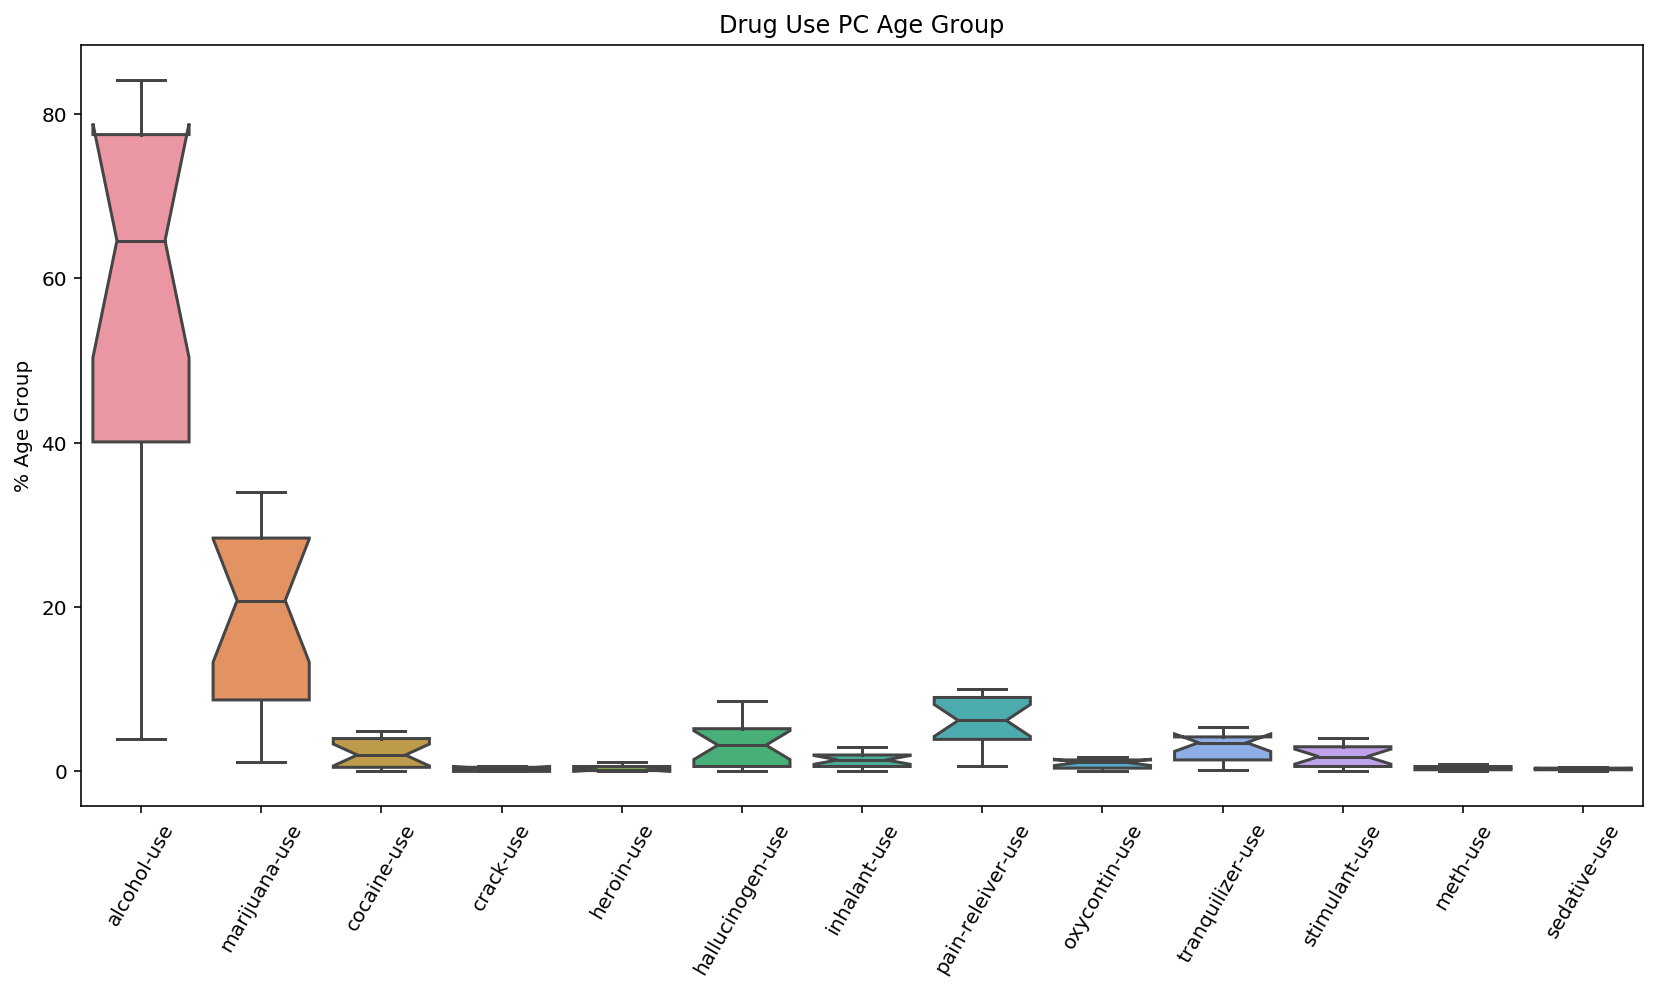

In [52]:
plt.figure(figsize=(14,7))
sns.boxplot(data=drugs_pc_use.iloc[:,2:], notch = True)
plt.title('Drug Use PC Age Group')
plt.ylabel("% Age Group")
plt.xticks(rotation=60)

<div class="alert alert-block alert-info">  Explore alcohol and marijuana % use across age groups </div>

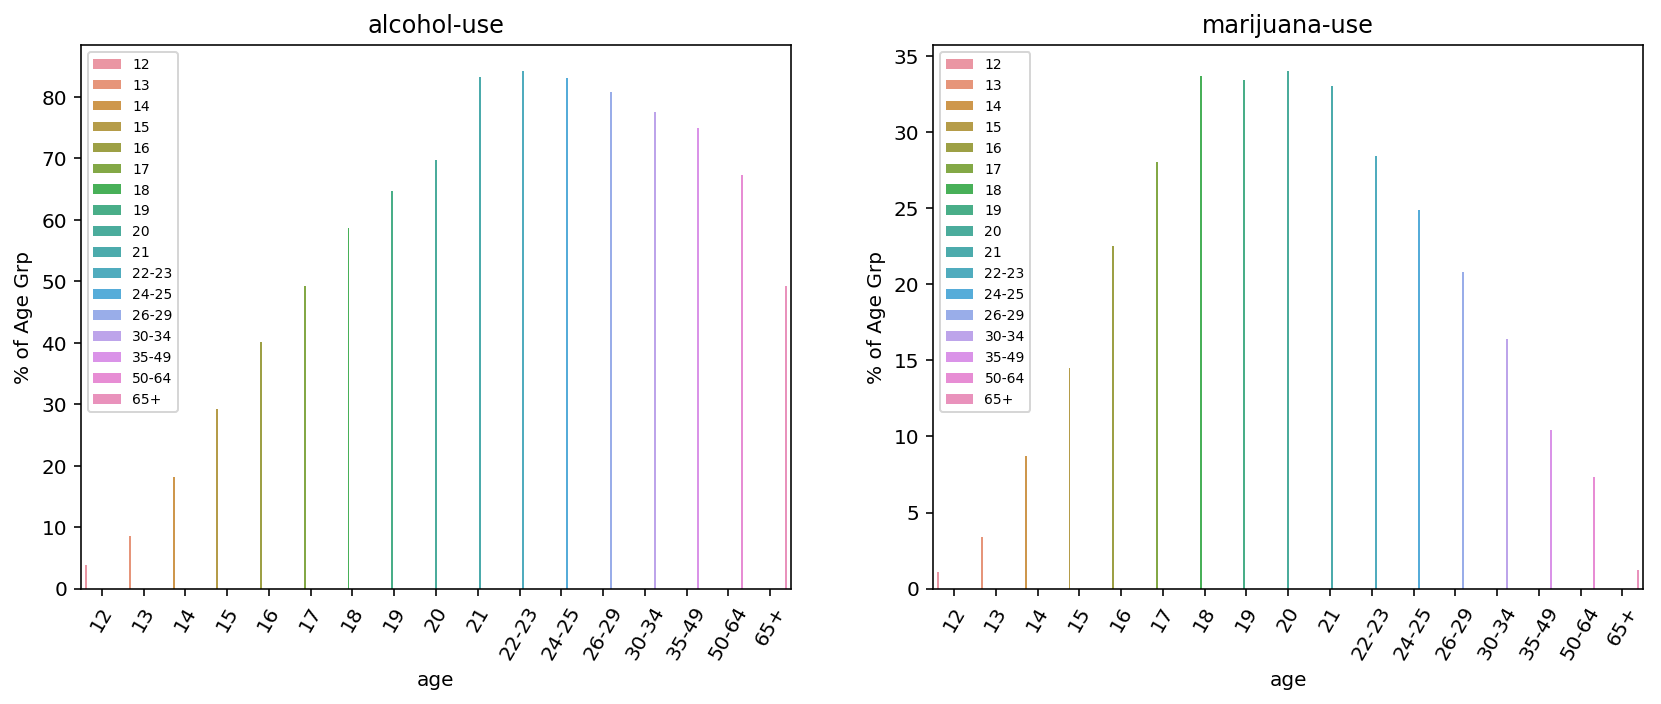

In [53]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(x = "age", y=drugs_pc_use.iloc[:,2], data = drugs_pc_use, hue='age')

plt.legend(loc=2,fontsize='x-small')
plt.xticks(rotation =60)
plt.ylabel('% of Age Grp')
plt.title(drugs_pc_use.columns.tolist()[2])

plt.subplot(1,2,2)
sns.barplot(x = "age", y=drugs_pc_use.iloc[:,3], data = drugs_pc_use, hue='age')
plt.legend(loc=2,fontsize='x-small')
plt.xticks(rotation =60)
plt.ylabel('% of Age Grp')
plt.title(drugs_pc_use.columns.tolist()[3])

<div class="alert alert-block alert-info">  Explore heroin and stimulant frequency of use across age groups </div>

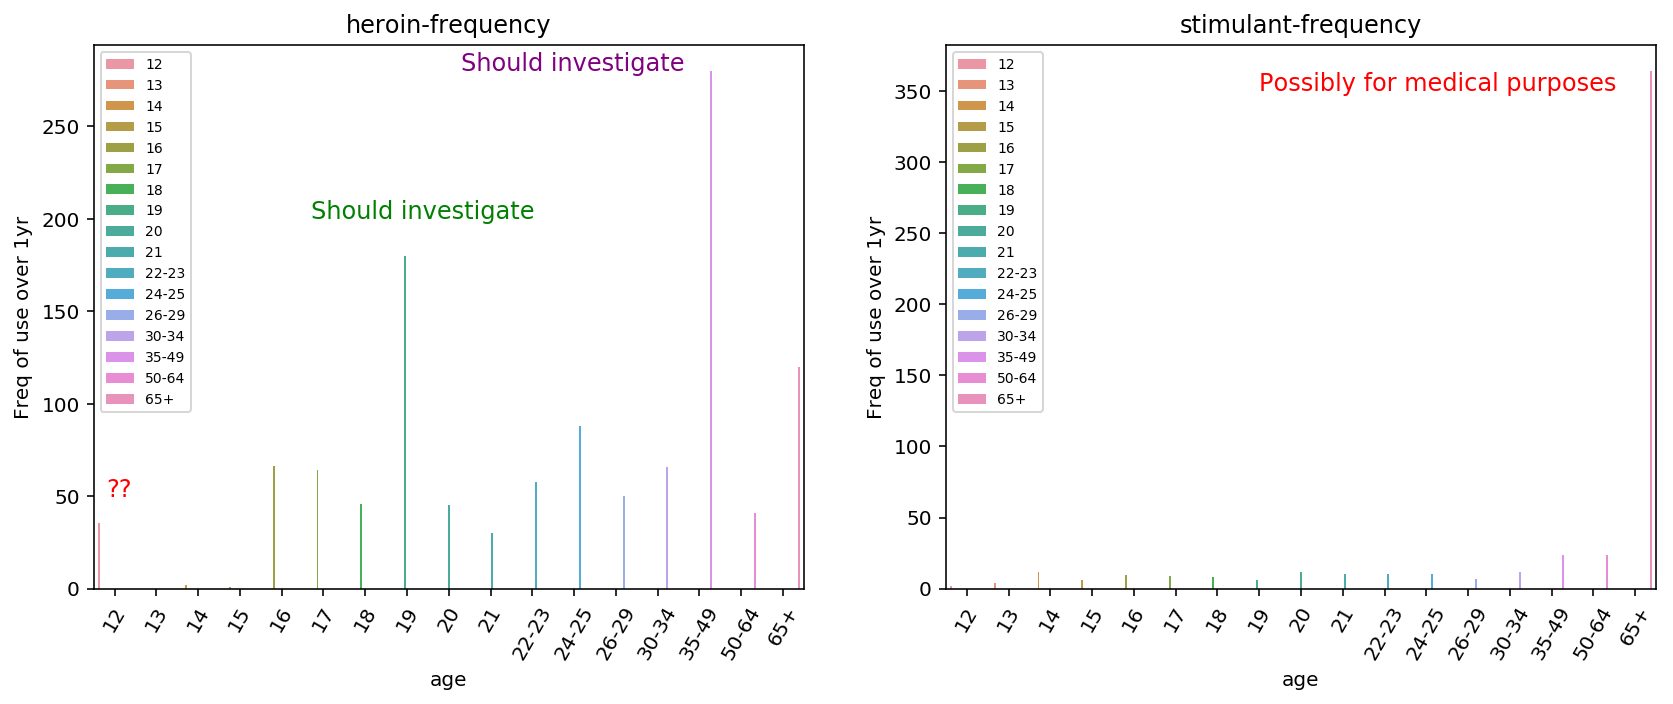

In [54]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(x = "age", y=drugs_freq.iloc[:,6], data = drugs_freq, hue='age')

plt.legend(loc=2,fontsize='x-small')
plt.xticks(rotation =60)
plt.ylabel('Freq of use over 1yr')
plt.annotate("??", xy=(-0.2,50),xytext=(-0.2,50), fontsize=12,color = 'red')
plt.annotate("Should investigate", xy=(4.7,200),xytext=(4.7,200), fontsize=12,color = 'green')
plt.annotate("Should investigate", xy=(8.3,280),xytext=(8.3,280), fontsize=12,color = 'purple')

plt.title(drugs_freq.columns.tolist()[6])

plt.subplot(1,2,2)
sns.barplot(x = "age", y=drugs_freq.iloc[:,-3], data = drugs_freq, hue='age')
plt.legend(loc=2,fontsize='x-small')
plt.xticks(rotation =60)
plt.annotate("Possibly for medical purposes", xy=(7,350),xytext=(7,350), fontsize=12,color = 'red')
plt.ylabel('Freq of use over 1yr')
plt.title(drugs_freq.columns.tolist()[-3])

<div class="alert alert-block alert-warning">  At this point, we have identified the following areas of concern:
</div>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-mtwr{background-color:#bbdaff;vertical-align:top}
.tg .tg-14nr{background-color:#bbdaff;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-14nr" colspan="2">Drug classes of concern</th>
    <th class="tg-mtwr">Age groups of concern</th>
  </tr>
  <tr>
    <td class="tg-14nr">`Marijuana`</td>
    <td class="tg-14nr">` Heroin`</td>
    <td class="tg-14nr">21</td>
  </tr>
  <tr>
    <td class="tg-14nr">High frequency</td>
    <td class="tg-14nr">High frequency</td>
    <td class="tg-14nr">35-49</td>
  </tr>
  <tr>
    <td class="tg-14nr">High % of use</td>
    <td class="tg-14nr">Low % of use</td>
    <td class="tg-14nr"></td>
  </tr>
</table>



In [55]:
Age3549_pc_use = drugs_pc_use.iloc[14,2:]
Age3549_freq = drugs_freq.iloc[14,2:]
newindex={}
for string in Age3549_freq.index:
    newstring = string[:-5]
    newindex[string] = newstring
Age3549_freq.rename(newindex,inplace=True)

Age21_pc_use = drugs_pc_use.iloc[9,2:]
Age21_freq = drugs_freq.iloc[9,2:]
newindex={}
for string in Age21_freq.index:
    newstring = string[:-5]
    newindex[string] = newstring
Age21_freq.rename(newindex,inplace=True)

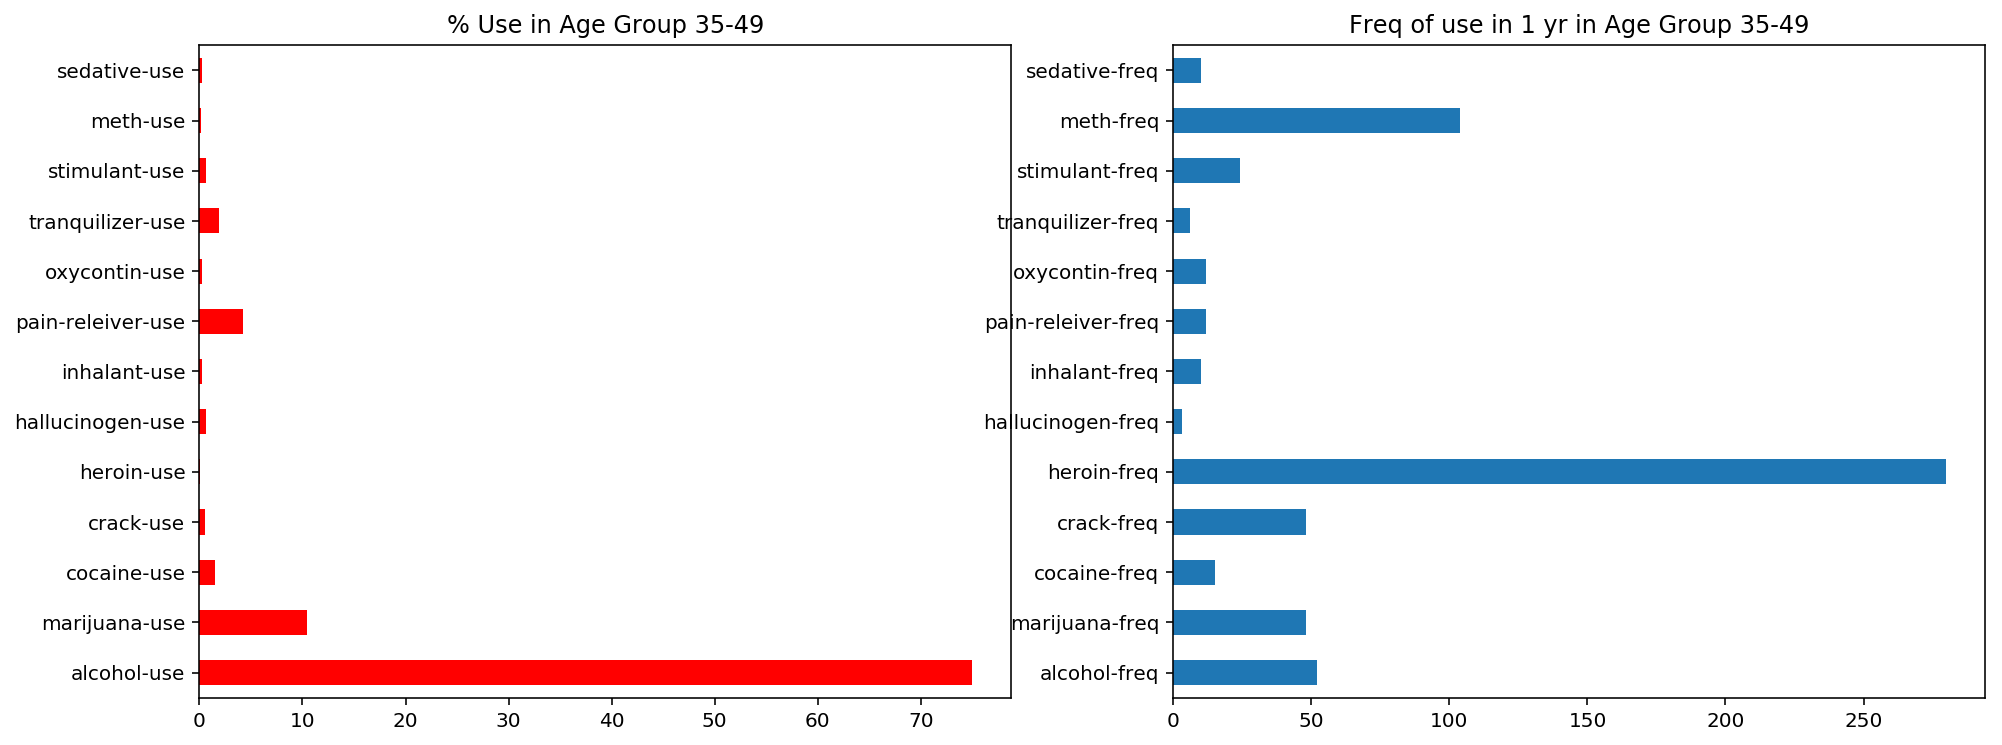

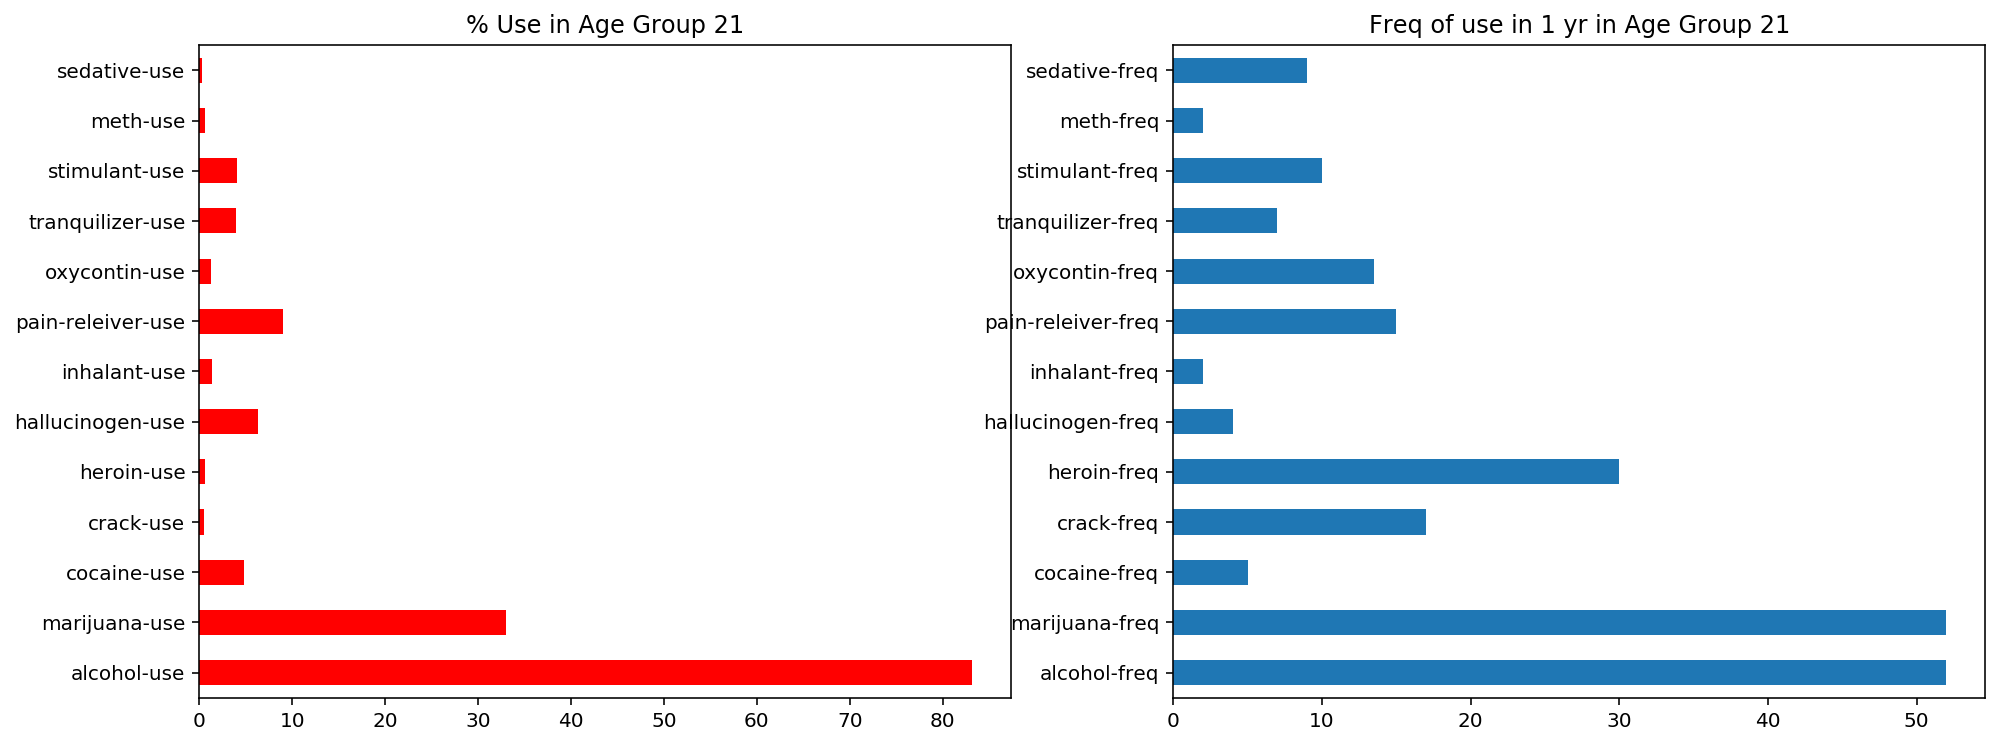

In [56]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('% Use in Age Group 35-49')
Age3549_pc_use.plot.barh(colormap = "prism")
plt.subplot(1,2,2)
plt.title('Freq of use in 1 yr in Age Group 35-49')
Age3549_freq.plot.barh()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('% Use in Age Group 21')
Age21_pc_use.plot.barh(colormap = "prism")
plt.subplot(1,2,2)
plt.title('Freq of use in 1 yr in Age Group 21')
Age21_freq.plot.barh()

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

<div class = "alert alert-block alert-info">** Question and deliverables:**

We would like to find out if the consumption of marijuana is becoming more frequent than alcohol consumption across all age groups. If it is, it could be a major concern for the mayor, and he may wish to look into it as a social issue.

<div class = "alert alert-block alert-success">Therefore we formulate the Null hypothesis as the difference of means of marijuana use over a 1 year period from the mean of alcohol use over the same 1 year period across all age groups >= 0 at a significance level of 95%.
<br>
<br>H_0: μ marijuana use freq - μ alcohol use freq   >= 0

<br>H_a: μ marijuana use freq - μ alcohol use freq   < 0 </div>

<br>If p > α (0.05) : we do not reject the Null hypothesis
<br>If p < α (0.05) : we reject the Null hypothesis

</div>

In [57]:
# Code
#Generating a permutation sample-----------------------------------------------

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

#Generating permutation replicates--------------------------------------------
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# Function to find difference of means----------------------------------------
    
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [58]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(drugs_freq[cols[5]], drugs_freq[cols[3]])
empirical_diff_means

9.588235294117645

In [59]:
#Compute permutation samples and find p-value

perm_replicates = draw_perm_reps(drugs_freq[cols[5]], drugs_freq[cols[3]],diff_of_means, size=100000)

In [60]:
# Hypothesis testing and compute p-value
def hypo_testing(data1,data2,alpha, func = diff_of_means,size = 100000):
    import scipy.stats as stats
    
    empirical_diff_means = diff_of_means(data1, data2)
    perm_replicates = draw_perm_reps(data1, data2,func, size=size)
    p = np.sum(perm_replicates >=empirical_diff_means) / float(len(perm_replicates))

    # Print the result
    print "Statistic replicate : Max = %f , Min = %f , Mode = %d" % (perm_replicates.max(),perm_replicates.min(),
                                                                     stats.mode(perm_replicates)[1][0])
    print 'p-value = %.8f' %(p) 
    
    plt.hist(perm_replicates,bins=20)
    plt.title('Distribution of %d permutation samples' % size)
    plt.axvline(empirical_diff_means, lw=2.5, color='red', ls='dashed')
    
    if p >= alpha:
        print "p-value is greater than alpha (%.4f). So we cannot reject the null hypothesis" %alpha
    else:
        print "p-value is lower than alpha (%.4f). So we reject the null hypothesis." %alpha
    

Statistic replicate : Max = 26.529412 , Min = -30.529412 , Mode = 719
p-value = 0.08594000
p-value is greater than alpha (0.0500). So we cannot reject the null hypothesis


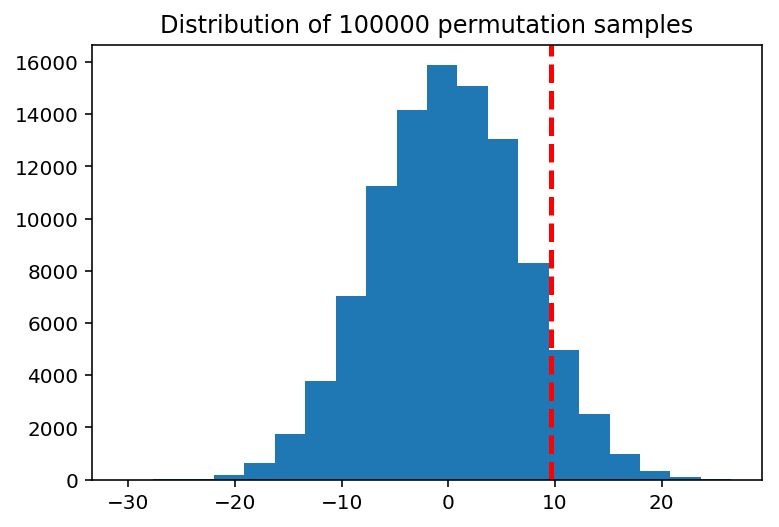

In [61]:
hypo_testing(drugs_freq[cols[5]], drugs_freq[cols[3]],0.05,size=100000)

<div class = "alert alert-block alert-info">**Report**
<br>
<br>p > α (0.05) 
<br>
<br>Hence we do not reject the Null hypothesis!! The mean of marijuana use over a 1 year period is highly likely >= the mean of alcohol use across all age groups 

</div>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

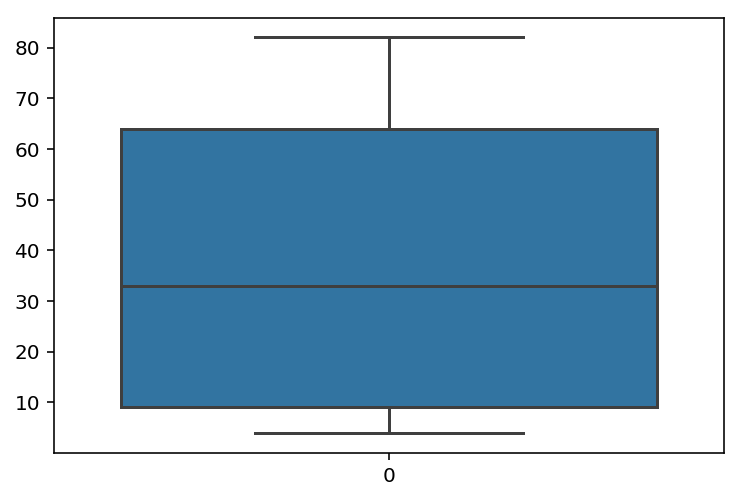

In [62]:
sns.boxplot(data=sat_df.Rate)

<div class="alert alert-block alert-warning"> An outlier is an observation that lies an abnormal distance from other values in a random sample from a population, usually defined as data points that lie greater than 2 or 3 standard deviations away from the mean</div>

In [63]:
#Assuming outliers are larger than 2x S.D

sat_outliers = sat_df[~(np.abs(sat_df.Rate-sat_df.Rate.mean()) <= (2*sat_df.Rate.std()))]

In [64]:
sat_outliers

,State,Rate,Verbal,Math


<div class="alert alert-block alert-warning"> No outliers could be found in Rate via the IQR or the Mean/SD approach. </div>

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


<img src="http://www.mathnstuff.com/math/spoken/here/2class/90/ht21c.gif">

In [65]:
sat_df.corr(method = "spearman")

,Rate,Verbal,Math
Rate,1.000000,-0.836058,-0.811662
Verbal,-0.836058,1.000000,0.909413
Math,-0.811662,0.909413,1.000000


In [66]:
sat_df.corr(method = "pearson")

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<div class="alert alert-block alert-success">Pearson's correlation evaluates linear relationships between the raw values of two variables, while Spearman's correlation evaluates linear relationships between the ranking of two variables. If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.
<div>---
</div>
<div>Intuitively, the Spearman correlation between two variables will be high when observations have a similar (or identical for a correlation of 1) rank between the two variables, and low when observations have a dissimilar rank between the two variables.
</div>
<div>---
</div>
<div>The Spearman correlation is less sensitive than the Pearson correlation to strong outliers that are in the tails of both samples because it limits the outlier to the value of its rank.</div>

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [67]:
sat_df["Percentile"] = sat_df.Rate.rank(pct=True)*100


In [68]:
print sat_df.head(5)
print sat_df.tail(5)

  State  Rate  Verbal  Math  Percentile
0    CT    82     509   510  100.000000
1    NJ    81     499   513   98.039216
2    MA    79     511   515   96.078431
3    NY    77     495   505   94.117647
4    NH    72     520   516   92.156863
   State  Rate  Verbal  Math  Percentile
46    UT     5     575   570    8.823529
47    IA     5     593   603    8.823529
48    SD     4     577   582    3.921569
49    ND     4     592   599    3.921569
50    MS     4     566   551    3.921569


In [69]:
sat_df[sat_df.State == "CA"]

,State,Rate,Verbal,Math,Percentile
23,CA,51,498,517,55.882353


<div class="alert alert-block alert-success">Percentile ranks the values of each variable on a scale between 0 to 100. Spearman rank correlation ranks the values of two variables and finds the sum of the square of the distance between paired value ranks. It ranges between -1 to +1.</div>

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

## Percentile scoring provides a fast and robust way of identifying the outliers by a simple ranking approach.

In [70]:
heroin = new_drugs.drop(cols[2:10],axis=1).drop(cols[12:],axis=1)

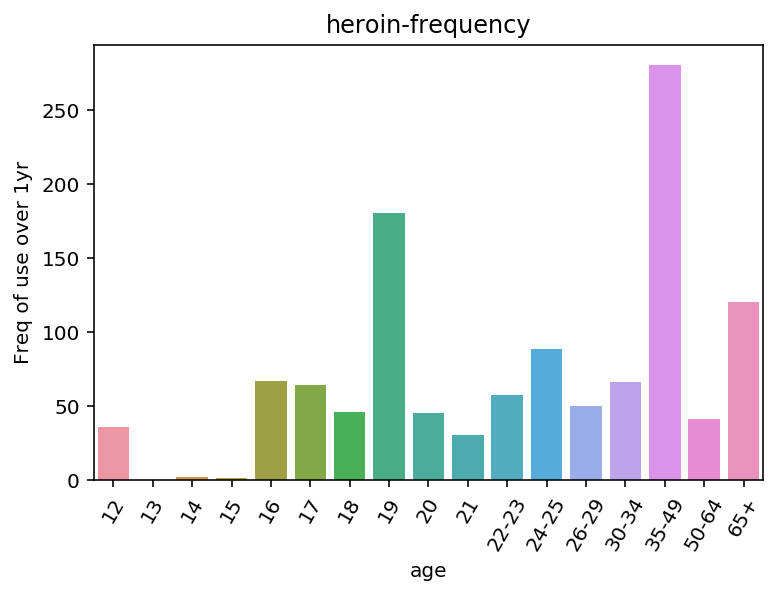

In [71]:
sns.barplot(x='age',y='heroin-frequency',data=heroin)
plt.xticks(rotation = 60)
plt.title('heroin-frequency')
plt.ylabel('Freq of use over 1yr')

In [72]:
heroin["FreqPercentile"] = heroin["heroin-frequency"].rank(pct=True)*100
heroin_sorted = heroin.sort_values("FreqPercentile", ascending=False)

In [73]:
heroin.head()

,age,n,heroin-use,heroin-frequency,FreqPercentile
0,12,2798,0.1,35.5,29.411765
1,13,2757,0.0,0.0,5.882353
2,14,2792,0.1,2.0,17.647059
3,15,2956,0.2,1.0,11.764706
4,16,3058,0.1,66.5,76.470588


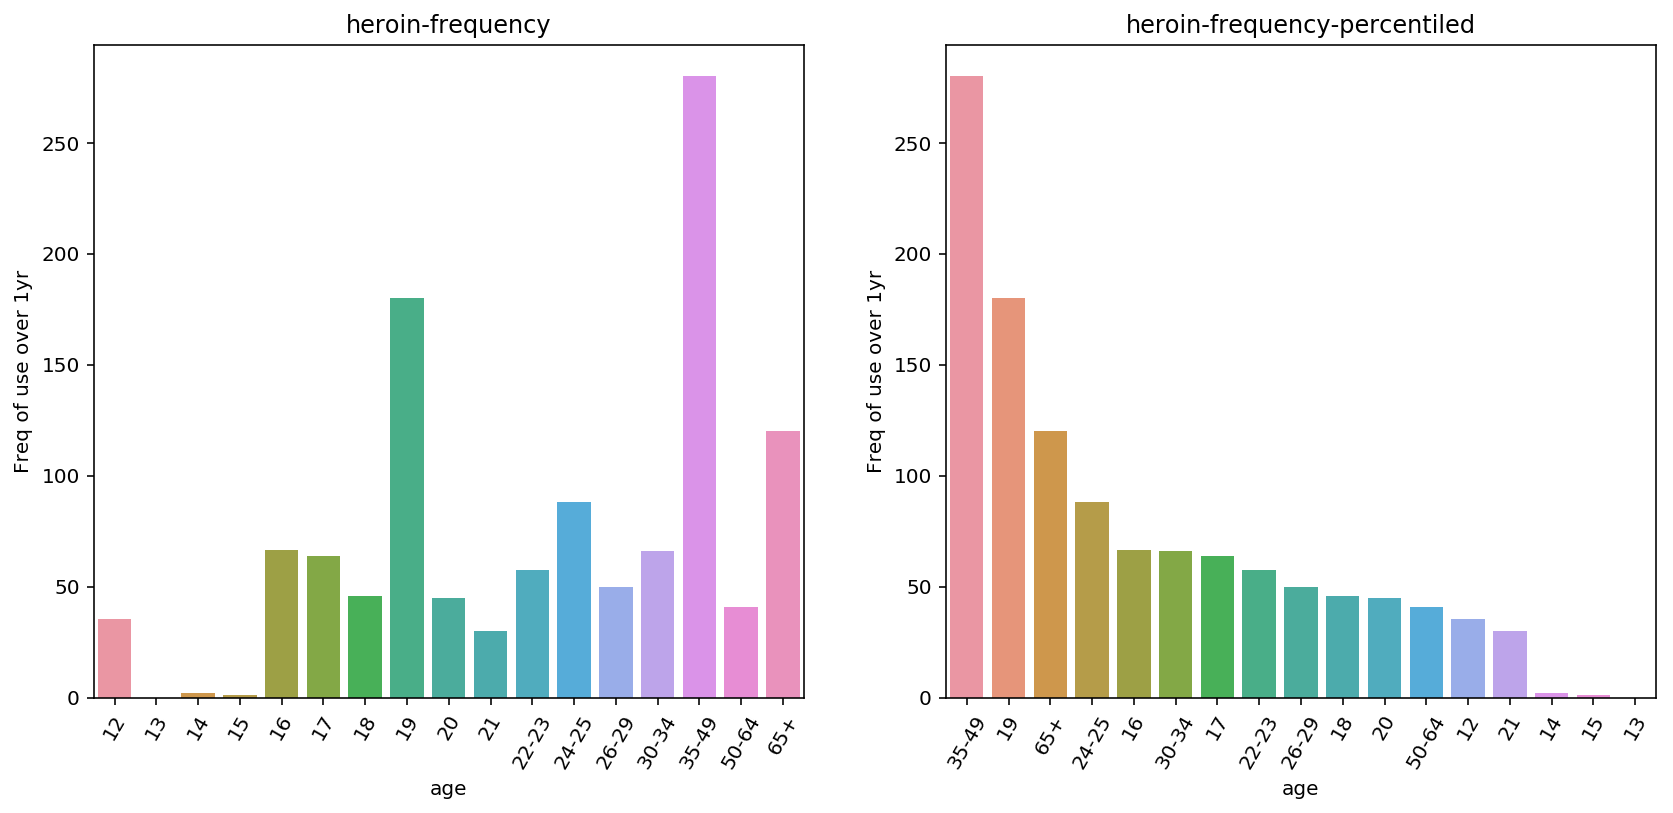

In [74]:
plt.subplots(1,2,figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x='age',y='heroin-frequency',data=heroin)
plt.xticks(rotation = 60)
plt.title('heroin-frequency')
plt.ylabel('Freq of use over 1yr')

plt.subplot(1,2,2)
sns.barplot(x='age',y='heroin-frequency',data=heroin_sorted)
plt.xticks(rotation = 60)
plt.title('heroin-frequency-percentiled')
plt.ylabel('Freq of use over 1yr')

<div class="alert alert-block alert-success"> Visually, the percentiled values look like a ranking of the datapoints. 

<div class="alert alert-block alert-success">The distribution profile of the percentiled values may differ from the distribution profile of the raw data. </div>